In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import amd
import time

%load_ext autoreload
%autoreload 2

In [2]:
curr_path = Path().absolute()
dataset_parent = curr_path.parent.parent / 'datasets' / 'similarity-datasets'

element = 'Si'
data_key = f'{element}_O_only_10_common'
cif_path = dataset_parent / 'CIFs' / f'{data_key}'
# get a list of cif files
cif_list = [entry for entry in cif_path.iterdir() if entry.is_file()]
cif_list.sort()

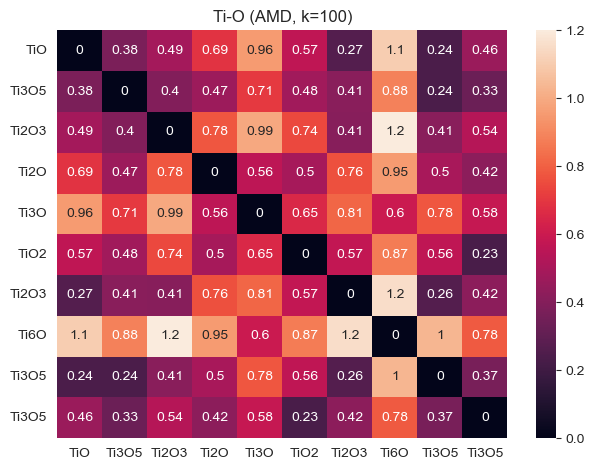

Comparing 10x10 PDDs (k=100): 100%|██████████| 100/100 [00:00<00:00, 15142.44it/s]


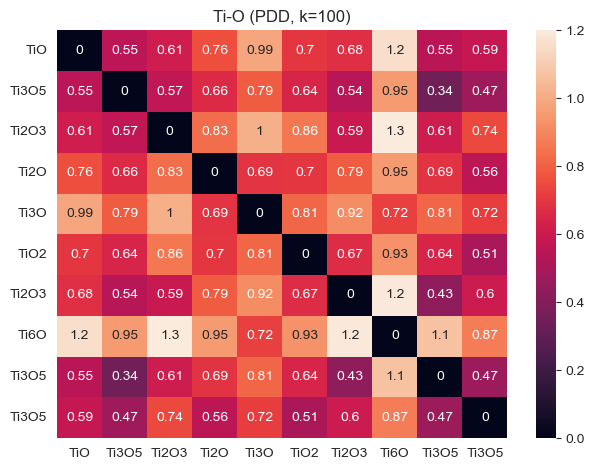

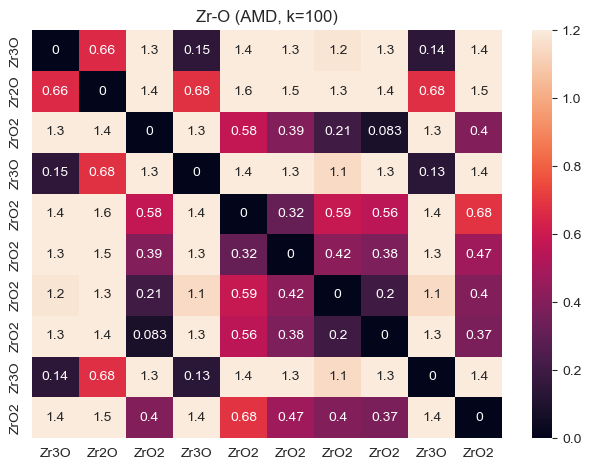

Comparing 10x10 PDDs (k=100): 100%|██████████| 100/100 [00:00<00:00, 28976.19it/s]


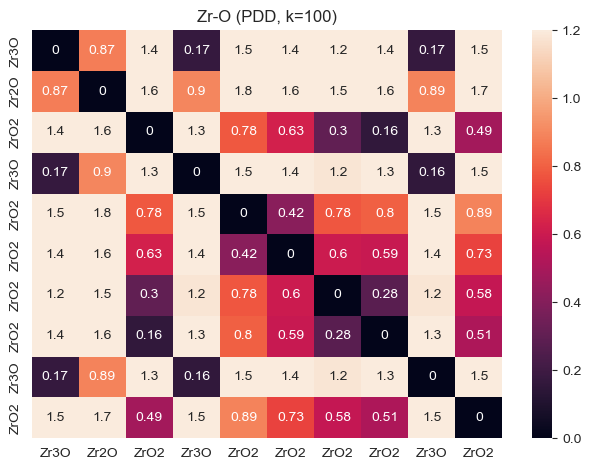

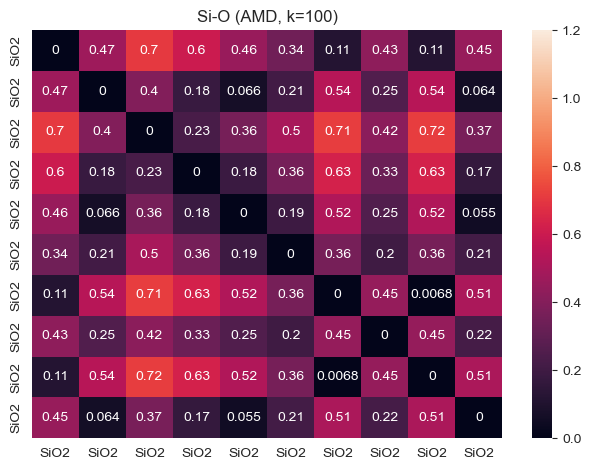

Comparing 10x10 PDDs (k=100): 100%|██████████| 100/100 [00:00<00:00, 4177.09it/s]


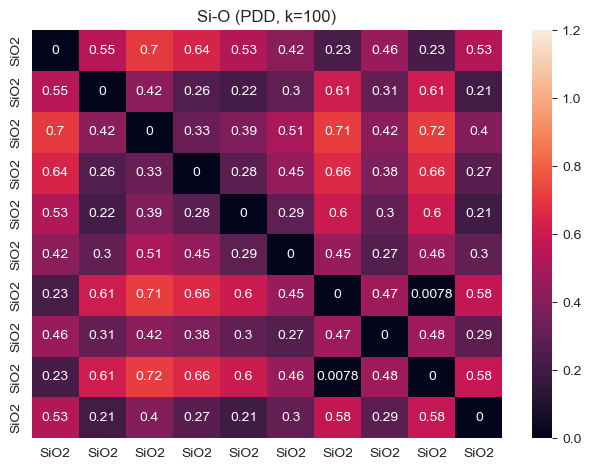

In [15]:
methods = ['AMD', 'PDD']
k = 100 # default
elements = ['Ti', 'Zr', 'Si']
short_key = '10_common'

figure_write_folder = curr_path.parent / 'figures' / 'poster_amd'
figure_write_folder.mkdir(parents=True, exist_ok=True) # create the folder if it doesn't exist

for element in elements:
    data_key = f'{element}_O_only_10_common'
    cif_path = dataset_parent / 'CIFs' / f'{data_key}'
    # get a list of cif files
    cif_list = [entry for entry in cif_path.iterdir() if entry.is_file()]
    cif_list.sort()

    for method in methods:
        dm = amd.compare(cif_list, cif_list, by=method, k=k)
        # save data
        dm.to_csv(figure_write_folder / f'{element}_{method}_{short_key}_{k}.csv')
        # plot heatmap
        mask = np.triu(np.ones_like(dm, dtype=bool)) # make a lower triangular mask
        # Plot the heatmap with the mask
        sns.heatmap(dm, annot=True, vmin=0, vmax=1.2)
        plt.grid(False)
        plt.title(f'{element}-O ({method}, k={k})')
        plt.tight_layout()
        plt.savefig(figure_write_folder / f'{element}_{method}_{short_key}_{k}.png', dpi=300)
        plt.savefig(figure_write_folder / f'{element}_{method}_{short_key}_{k}.svg', transparent=True)
        plt.show()
        # break
    
    # break

# Combine Si, Ti, Zr

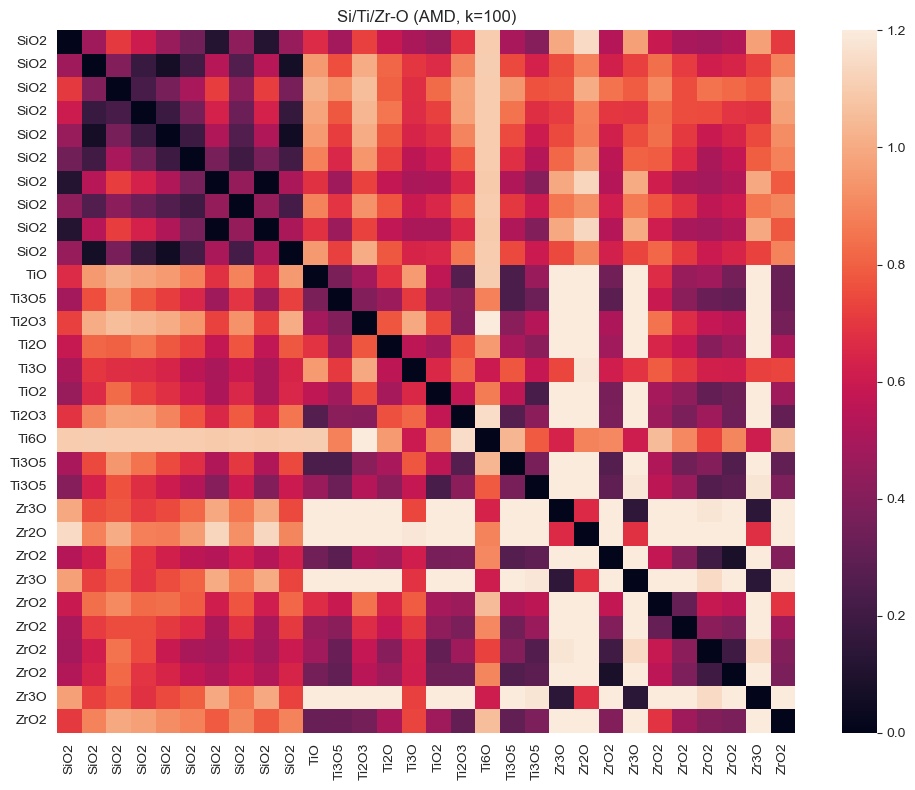

Comparing 30x30 PDDs (k=100): 100%|██████████| 900/900 [00:00<00:00, 9395.33it/s]


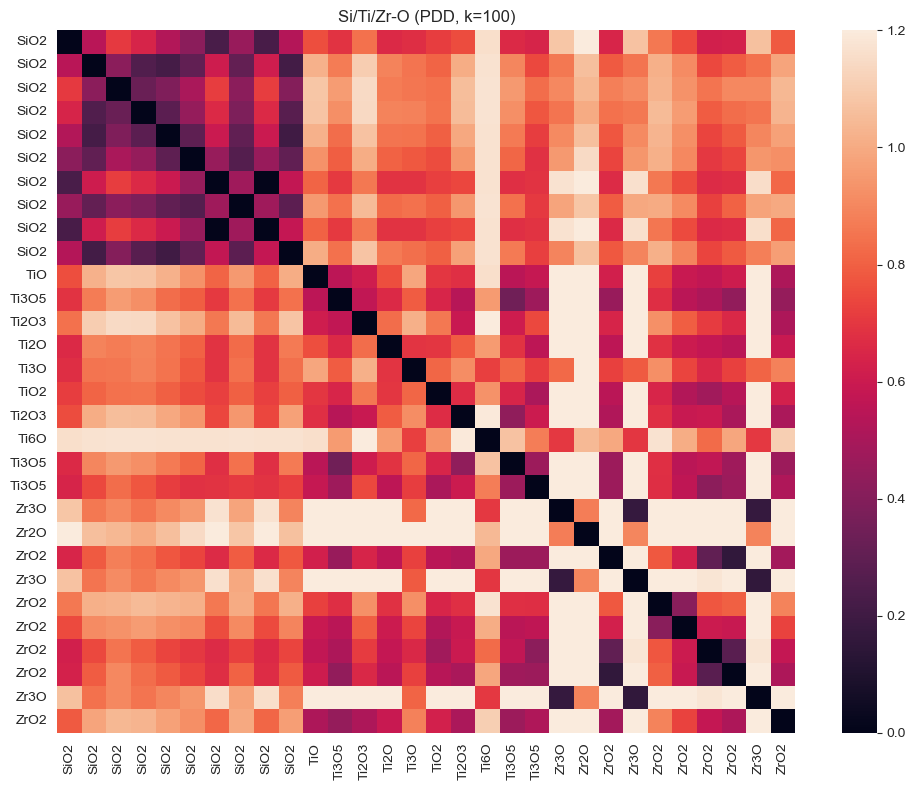

In [14]:
methods = ['AMD', 'PDD']
k = 100 # default
elements = ['Si', 'Ti', 'Zr']
short_key = '10_common_combined'

figure_write_folder = curr_path.parent / 'figures' / 'poster_amd'
figure_write_folder.mkdir(parents=True, exist_ok=True) # create the folder if it doesn't exist

cif_list_combined = []
for element in elements:
    data_key = f'{element}_O_only_10_common'
    cif_path = dataset_parent / 'CIFs' / f'{data_key}'
    # get a list of cif files
    cif_list = [entry for entry in cif_path.iterdir() if entry.is_file()]
    cif_list.sort()
    for cif_path in cif_list:
        cif_list_combined.append(cif_path)

for method in methods:
    dm = amd.compare(cif_list_combined, cif_list_combined, by=method, k=k)
    # save data
    dm.to_csv(figure_write_folder / f'SiTiZr_{method}_{short_key}_{k}.csv')
    # plot heatmap
    mask = np.triu(np.ones_like(dm, dtype=bool)) # make a lower triangular mask
    # Plot the heatmap with the mask
    plt.figure(figsize=(10,8))
    sns.heatmap(dm, annot=False, vmin=0, vmax=1.2)
    plt.grid(False)
    plt.title(f'Si/Ti/Zr-O ({method}, k={k})')
    plt.tight_layout()
    plt.savefig(figure_write_folder / f'SiTiZr_{method}_{short_key}_{k}.png', dpi=300)
    plt.savefig(figure_write_folder / f'SiTiZr_{method}_{short_key}_{k}.svg', transparent=True)
    plt.show()